## Naive Bayes - Hands on Session

### Agenda
  1. Manual Calculation
      
      ♦ Demonstration with an example

  
  2. Case Study - Flights Arrival Prediction 
    
    ♦ Problem Description

    ♦ Data Understanding
    
    ♦ Split the data into Train and Validation sets
    
    ♦ Data Engineering to send into the naive bayes model
    
    ♦ Build a Naive Bayes model


### Problem Description

##### Whether the weather condition is favorable to play tennis or not based on the historical data collected

In [1]:
### Read data
data<-read.csv("/home/divyas/Lab/Tennis_Data.csv")
head(data)

,Outlook,Temperature,Humidity,Windy,Class
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Sunny,Hot,High,Weak,No
2,Sunny,Hot,High,Strong,No
3,Overcast,Hot,High,Weak,Yes
4,Rain,Mild,High,Weak,Yes
5,Rain,Cool,Normal,Weak,Yes
6,Rain,Cool,Normal,Strong,No


#### Should we play tennis  "Outlook = Sunny, Temperature = Cool, Humidity = High, Windy = Strong"

#### Manual Computation



P(A|B) = P(B|A) * P(A) / P(B)  

P(Yes|Outlook = Sunny,Temperature = Cool,Humidity = High, Windy = Strong)

P(No|Outlook = Sunny,Temperature = Cool,Humidity = High, Windy = Strong)


P(Yes|Outlook = Sunny,Temperature = Cool,Humidity = High, Windy = Strong) = 

            
       P(Yes) * P(Outlook = Sunny|Yes) * P(Temperature = Cool|Yes) * P(Humidity = High|Yes) * P(Windy = Strong|Yes)


P(No|Outlook = Sunny,Temperature = Cool,Humidity = High, Windy = Strong) = 

        P(No) * P(Outlook = Sunny|No) * P(Temperature = Cool|No) * P(Humidity = High|No) * P(Windy = Strong|No)


In [12]:
data

Outlook,Temperature,Humidity,Windy,Class
<chr>,<chr>,<chr>,<chr>,<chr>
Sunny,Hot,High,Weak,No
Sunny,Hot,High,Strong,No
Overcast,Hot,High,Weak,Yes
Rain,Mild,High,Weak,Yes
Rain,Cool,Normal,Weak,Yes
Rain,Cool,Normal,Strong,No
Overcast,Cool,Normal,Strong,Yes
Sunny,Mild,High,Weak,No
Sunny,Cool,Normal,Weak,Yes


In [14]:
2/9

[1] 0.2222222

#### Estimating P(xi|C)

##### Outlook
P(sunny|yes) = 2/9 = 0.22 ; P(sunny|no) = 3/5 = 0.6


P(overcast|yes) = 4/9 = 0.44 ;  P(overcast|no) = 0

P(rain|yes) = 3/9 = 0.33 ;  P(rain|no) = 2/5 = 0.4

##### Temperature
P(hot|yes) = 2/9 = 0.22  ;  P(hot|no) = 2/5 = 0.4

P(mild|yes) = 4/9 = 0.44 ;  P(mild|no) = 2/5 = 0.4

P(cool|yes) = 3/9 = 0.33 ;  P(cool|no) = 1/5 = 0.2

##### Humidity
P(high|yes) = 3/9 = 0.33 ; P(high|no) = 4/5 = 0.8

P(normal|yes) = 6/9 = 0.67 ; P(normal|no) = 1/5 = 0.2

##### Windy
P(strong|yes) = 3/9 = 0.33 ; P(strong|no) = 3/5 = 0.6

P(weak|yes) = 6/9 = 0.67 ; P(weak|no) = 2/5 = 0.4

In [34]:
# P(Yes|Outlook = Sunny,Temperature = Cool,Humidity = High, Windy = Strong) = P(Yes) * P(Outlook = Sunny|Yes) * P(Temperature = Cool|Yes) * P(Humidity = High|Yes) * P(Windy = Strong|Yes)

(9/14) * (2/9) * (3/9) * (3/9) * (3/9)

[1] 0.005291005

In [35]:
# P(No|Outlook = Sunny,Temperature = Cool,Humidity = High, Windy = Strong) = P(No) * P(Outlook = Sunny|No) * P(Temperature = Cool|No) * P(Humidity = High|No) * P(Windy = Strong|No)

(5/14) * (3/5) * (1/5) * (4/5) * (3/5)

[1] 0.02057143

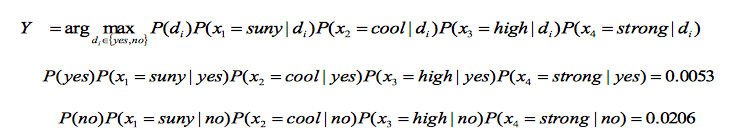

### Naive Bayes implimentation in R

In [36]:
## load library
library(e1071)

In [40]:
## Convert to factors

for (col in colnames(data)){
    data[,col] = as.factor(data[,col])
}

In [41]:
## Build Naive Bayes Model

model <- naiveBayes(Class ~ ., data = data)
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
       No       Yes 
0.3571429 0.6428571 

Conditional probabilities:
     Outlook
Y      Overcast      Rain     Sunny
  No  0.0000000 0.4000000 0.6000000
  Yes 0.4444444 0.3333333 0.2222222

     Temperature
Y          Cool       Hot      Mild
  No  0.2000000 0.4000000 0.4000000
  Yes 0.3333333 0.2222222 0.4444444

     Humidity
Y          High    Normal
  No  0.8000000 0.2000000
  Yes 0.3333333 0.6666667

     Windy
Y        Strong      Weak
  No  0.6000000 0.4000000
  Yes 0.3333333 0.6666667


In [46]:
new_data = data.frame(Outlook = "Sunny",Temperature = "Cool",Humidity = "High", Windy = "Strong")

In [47]:
predict(model,new_data)

[1] No
Levels: No Yes

## Naive Bayes - Flights Data

### Problem Description


Predict if the flight would be delayed or not with the given features:

CARRIER - Name of the Carrier

DEP_TIME - Departure Time

DEST - Destination Airport

FL_DATE - Date of Flight

ORIGIN - Origin Airport

Weather - Is the weather stormy (1 for stormy, 0 for not stormy)

Flight.Status - Is the Flight delayed or On Time

### Data Reading

In [3]:
### Read data
data<-read.csv("/home/divyas/Lab/Flights_Data.csv",stringsAsFactors=T)


### Data Understanding

In [16]:
## Dimensions

dim(data)

[1] 2201    7

In [17]:
## Structure

str(data)

'data.frame':	2201 obs. of  7 variables:
 $ CARRIER      : Factor w/ 8 levels "CO","DH","DL",..: 5 2 2 2 2 2 2 2 2 2 ...
 $ DEP_TIME     : int  1455 1640 1245 1709 1035 839 1243 1644 1710 2129 ...
 $ DEST         : Factor w/ 3 levels "EWR","JFK","LGA": 2 2 3 3 3 2 2 2 2 2 ...
 $ FL_DATE      : Factor w/ 31 levels "01/01/2004","01/02/2004",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ORIGIN       : Factor w/ 3 levels "BWI","DCA","IAD": 1 2 3 3 3 3 3 3 3 3 ...
 $ Weather      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Flight.Status: Factor w/ 2 levels "delayed","ontime": 2 2 2 2 2 2 2 2 2 2 ...


In [18]:
## First few rows

head(data)

,CARRIER,DEP_TIME,DEST,FL_DATE,ORIGIN,Weather,Flight.Status
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>
1,OH,1455,JFK,01/01/2004,BWI,0,ontime
2,DH,1640,JFK,01/01/2004,DCA,0,ontime
3,DH,1245,LGA,01/01/2004,IAD,0,ontime
4,DH,1709,LGA,01/01/2004,IAD,0,ontime
5,DH,1035,LGA,01/01/2004,IAD,0,ontime
6,DH,839,JFK,01/01/2004,IAD,0,ontime


In [19]:
## Last few rows

tail(data)

,CARRIER,DEP_TIME,DEST,FL_DATE,ORIGIN,Weather,Flight.Status
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>
2196,RU,650,EWR,01/31/2004,IAD,0,ontime
2197,RU,644,EWR,01/31/2004,DCA,0,ontime
2198,RU,1653,EWR,01/31/2004,IAD,0,ontime
2199,RU,1558,EWR,01/31/2004,DCA,0,ontime
2200,RU,1403,EWR,01/31/2004,DCA,0,ontime
2201,RU,1736,EWR,01/31/2004,DCA,0,ontime


### Summary Statistics

In [20]:
## Summary of the data
summary(data)

    CARRIER       DEP_TIME     DEST            FL_DATE     ORIGIN    
 DH     :551   Min.   :  10   EWR: 665   01/22/2004:  86   BWI: 145  
 RU     :408   1st Qu.:1004   JFK: 386   01/06/2004:  85   DCA:1370  
 US     :404   Median :1450   LGA:1150   01/08/2004:  85   IAD: 686  
 DL     :388   Mean   :1369              01/13/2004:  85             
 MQ     :295   3rd Qu.:1709              01/20/2004:  85             
 CO     : 94   Max.   :2330              01/21/2004:  85             
 (Other): 61                             (Other)   :1690             
    Weather        Flight.Status 
 Min.   :0.00000   delayed: 428  
 1st Qu.:0.00000   ontime :1773  
 Median :0.00000                 
 Mean   :0.01454                 
 3rd Qu.:0.00000                 
 Max.   :1.00000                 
                                 

### Split the data into Train and Validation sets

In [21]:
## Split row numbers into 2 sets
set.seed(1)
train_rows = sample(1:nrow(data), size=0.7*nrow(data))
validation_rows = setdiff(1:nrow(data),train_rows)

In [22]:
## Subset into Train and Validation sets
train_data <- data[train_rows,]
validation_data <- data[validation_rows,]

In [23]:
## View the dimensions of the data
dim(data)
dim(train_data)
dim(validation_data)

[1] 2201    7

[1] 1540    7

[1] 661   7

### Data Type Conversion
Check if any data type conversions have to be done.


In [24]:
str(train_data)

'data.frame':	1540 obs. of  7 variables:
 $ CARRIER      : Factor w/ 8 levels "CO","DH","DL",..: 2 1 7 2 3 6 8 5 4 4 ...
 $ DEP_TIME     : int  2133 1254 847 1630 629 1521 900 1455 1503 1534 ...
 $ DEST         : Factor w/ 3 levels "EWR","JFK","LGA": 3 1 3 2 3 1 3 2 3 3 ...
 $ FL_DATE      : Factor w/ 31 levels "01/01/2004","01/02/2004",..: 15 10 31 14 22 7 5 18 9 19 ...
 $ ORIGIN       : Factor w/ 3 levels "BWI","DCA","IAD": 3 2 3 2 2 2 2 1 2 2 ...
 $ Weather      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Flight.Status: Factor w/ 2 levels "delayed","ontime": 1 2 2 2 2 2 2 2 2 1 ...


In [25]:
str(validation_data)

'data.frame':	661 obs. of  7 variables:
 $ CARRIER      : Factor w/ 8 levels "CO","DH","DL",..: 2 2 2 2 2 3 4 4 4 7 ...
 $ DEP_TIME     : int  1640 1245 1709 839 2129 1458 1525 1452 1853 841 ...
 $ DEST         : Factor w/ 3 levels "EWR","JFK","LGA": 2 3 3 2 2 2 2 3 3 3 ...
 $ FL_DATE      : Factor w/ 31 levels "01/01/2004","01/02/2004",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ORIGIN       : Factor w/ 3 levels "BWI","DCA","IAD": 2 3 3 3 3 2 2 2 2 3 ...
 $ Weather      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Flight.Status: Factor w/ 2 levels "delayed","ontime": 2 2 2 2 2 2 2 2 2 2 ...


### Data Engineering

#### Date Manipulation

In [26]:
## Look at the head of Date variable

head(train_data$FL_DATE)

[1] 01/15/2004 01/10/2004 01/31/2004 01/14/2004 01/22/2004 01/07/2004
31 Levels: 01/01/2004 01/02/2004 01/03/2004 01/04/2004 ... 01/31/2004

In [28]:
## Parse Time
library(lubridate)

parsed_date = parse_date_time(train_data$FL_DATE,order="mdY")

head(parsed_date)


[1] "2004-01-15 UTC" "2004-01-10 UTC" "2004-01-31 UTC" "2004-01-14 UTC"
[5] "2004-01-22 UTC" "2004-01-07 UTC"

In [29]:
## Extracting day

head(day(parsed_date))

[1] 15 10 31 14 22  7

In [30]:
## Create new features day, month and year

train_data$day = day(parsed_date)
train_data$month = month(parsed_date)
train_data$year = year(parsed_date)

In [31]:
head(train_data)

,CARRIER,DEP_TIME,DEST,FL_DATE,ORIGIN,Weather,Flight.Status,day,month,year
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>
1017,DH,2133,LGA,01/15/2004,IAD,0,delayed,15,1,2004
679,CO,1254,EWR,01/10/2004,DCA,0,ontime,10,1,2004
2177,UA,847,LGA,01/31/2004,IAD,0,ontime,31,1,2004
930,DH,1630,JFK,01/14/2004,DCA,0,ontime,14,1,2004
1533,DL,629,LGA,01/22/2004,DCA,0,ontime,22,1,2004
471,RU,1521,EWR,01/07/2004,DCA,0,ontime,7,1,2004


In [32]:
## Check unique values

unique(train_data$month)
unique(train_data$year)

[1] 1

[1] 2004

In [33]:
## Remove Un-neccesary variables

train_data$FL_DATE = NULL
train_data$month = NULL
train_data$year = NULL

In [34]:
## Follow the same steps on Validation
parsed_date = parse_date_time(validation_data$FL_DATE,order="mdY")

validation_data$day = day(parsed_date)

validation_data$FL_DATE = NULL

#### Manual Binning

In [35]:
## Check theDeparture time column

train_data$DEP_TIME

[1] 2133 1254  847 1630  629 1521  900 1455 1503 1534 2116 1629 1356 2120
  [15] 1026 1256 1151 1057  755 1714 1931  856 1700 1456 1639 1719 2116 1355
  [29] 1704 1728 1230 2111  931  729 1937  730 1457 1237 1855 1254 1452 1859
  [43]  957 1059 1653 2120  858 1358 1253 1456  856  848  553 1700 1658 1258
  [57]  625 1714 1254  728 1527 1633  757 2114 1453 1100  832 1722 2153 1345
  [71] 1452 1353 1358 1728  853 1812 1833  655  655 1256 1501 1253 1529 2056
  [85] 1229 1355 1656 1506 1022 1740 1655 1455  757 1158 1703 1952 1758  656
  [99] 1455 1358 1128 1531 1600 1829 1510 2059 1030 2116  836 1715  729 1557
 [113] 1249 2055 1129  954 1249  556 1155 2030 1450 1055 1429 1555 1606 1236
 [127] 1834 1811 1500 2056  700 1826  552 1731  746 1918 1449  858  828 1245
 [141] 1030 1549  928 1524 1056 1458 1630 1559 1455 2010 1500 1428  635  826
 [155] 1516  858  656 1457 2125 1600  732 2058 1047 2106 2118 1433 1238  629
 [169] 1744  630 1156  558 1056 1640 1837 2004  857  651 1431  728 1057 1259
 [183] 1057  834 2054  729  552  654 2139 1429  652 1755 1716 1455 1820 1759
 [197] 1901 1612 1258 1025 1252 1725  855 1655 1255 2117 1450 1019 1531 1808
 [211] 1258 1602 1256  641 1825  758 2031 2115 1536 1727 1556  654 1732 1458
 [225]  627  925 1452 1502 1329 1058 1031  638 1310 1820  758 1858  958 1846
 [239] 1843 1615 1456 1514  553 1604  634 1632 1454 1030 2214 1656 1730  833
 [253] 1359  626 1522  653 1717  831 1129 1030 1638  851  706 1714 1959  758
 [267] 1715  555 1709 1159 1352  655 1312 1457 1256 1504  700 1728 1331  932
 [281] 1030 1715 1258 1832 1633 1255 1026 2112 1601 1457 1028 1829 1030 1723
 [295] 1515 1255 1758 1456 1255 1028  929  829 1357 1505  703  757 1029 1056
 [309] 1329 1855 1050  844 1854 1649  645  955  640 1532 1727 1529 1129 1930
 [323] 1231 2244 1255  627 1650  729  658 1624 1556 1644  956 1030  859 2032
 [337] 1455 1457  659 1601 1028  729  859 1858 1131 1456 1554 1717  956 1450
 [351] 1236 1555 1230 1026 1255 1741  640 1618 2058  754 1037 1916 1450  630
 [365] 1328  856 1605 1153 2145 1455 1455  659 1338 1607 1729 1128 1520 1715
 [379] 1739 1851 1513 1627 1430 1238 1500 1027 1756 1523 1242 1032 1540 1710
 [393] 1130 1157 1421 1355 1030  627 1326 1656  836 2151 1658  815 1357 1700
 [407] 1313 1959 1657 1455 1528 1652 1035 1033  931 1822 1457 1005 1331 1557
 [421] 1710 1427 1459 1858 1314 1956 1059  654 2024 2118 1855 1449 1656 1600
 [435]  833  624 2113 1624 1702 1607 1252  631 1732  658 1632 1706 1637 1731
 [449]  858 2118  629 1236  640  659 1853 1948 1038 1044  830 1401 1033  941
 [463]  920 1231 2050 1058  756  956 1255  844 1513 1445 1303 2028 1521 1956
 [477] 1519  815 1714  858  848  658 1852 1451 1456 1230 1202 1356  835 1454
 [491] 1231 1259 1849  852 1456 1430  641  629 1331  643 1639  833 1032 1432
 [505] 1726  731  657 1828 1644 1356 1759 2110 1931 1732 1549  858 1956  656
 [519]  957 1247 1638 2120 1522 1639 2027 1237  727 1852 2130 1330 1237 2031
 [533]  859 1237 1648 1456 1758 1313  928 1435  656 2213 1850 1257 1429  643
 [547]  657 1453 2130 1754 1040  852 1057 1831  627 1900  832  657 1603 1504
 [561] 1714  849 1714 1700 1428 1429 1330 2150 1633  857 1427 1428  731 1157
 [575]  946 1056 1509 1530 2033  657 1629  659 1829 1357 1235 1230  707 1645
 [589] 1531 1617 1050 1246 1642  840 1635 1350 1458 1552  932 1843  904  755
 [603]  726 1458 1858 1600 1430 2029 1526 1559 1529 1257 1855 1737  830 1029
 [617] 1500  732 1523 1710  855 1228 1653  858 1620 1957 1712 2211 1100 1857
 [631] 1629  855 1359 2116 1359  848 2028 1032 1450 1816 1711 1958  859 1855
 [645]  955  626 1256 1408 1636  657 1141 1506 1244 1130 1714 1358 1858 1551
 [659] 1526 2100 2120  630 1859 1558  831 1240 1034 1456 1327 1256  731 1930
 [673] 1851  714 2006 1257 2220  700 2151  630 1448 1856 2029 1457 1855 1937
 [687]  729 1240 2121  758  847 1429 1452 1053  624  645 1442 1030 1259 1706
 [701]  657 1307 1452 1634 1644 1500 1256 1857 1259 1158  958  730 1048 1251
 [715] 1451 1230  831 1656 1559 1827 1714 1951  858 1252 1500 1829 1723  829

In [36]:
## Create a new placeholder column 

train_data$DEP_TIME_BIN = 0

In [37]:
## Using for loop - create time bins for each hour

for(i in 1:nrow(train_data)) {

    if(train_data$DEP_TIME[i]<100) {train_data$DEP_TIME_BIN[i]="0000-0059"}
    else if(train_data$DEP_TIME[i]<200)  {train_data$DEP_TIME_BIN[i]="0100-0159"}
    else if(train_data$DEP_TIME[i]<300)  {train_data$DEP_TIME_BIN[i]="0200-0259"}
    else if(train_data$DEP_TIME[i]<400)  {train_data$DEP_TIME_BIN[i]="0300-0359"}
    else if(train_data$DEP_TIME[i]<500)  {train_data$DEP_TIME_BIN[i]="0400-0459"}    
    else if(train_data$DEP_TIME[i]<600)  {train_data$DEP_TIME_BIN[i]="0500-0559"}
    else if(train_data$DEP_TIME[i]<700)  {train_data$DEP_TIME_BIN[i]="0600-0659"}
    else if(train_data$DEP_TIME[i]<800)  {train_data$DEP_TIME_BIN[i]="0700-0759"}
    else if(train_data$DEP_TIME[i]<900)  {train_data$DEP_TIME_BIN[i]="0800-0859"}
    else if(train_data$DEP_TIME[i]<1000) {train_data$DEP_TIME_BIN[i]="0900-0959"}
    else if(train_data$DEP_TIME[i]<1100) {train_data$DEP_TIME_BIN[i]="1000-1059"}
    else if(train_data$DEP_TIME[i]<1200) {train_data$DEP_TIME_BIN[i]="1100-1159"}
    else if(train_data$DEP_TIME[i]<1300) {train_data$DEP_TIME_BIN[i]="1200-1259"}
    else if(train_data$DEP_TIME[i]<1400) {train_data$DEP_TIME_BIN[i]="1300-1359"}
    else if(train_data$DEP_TIME[i]<1500) {train_data$DEP_TIME_BIN[i]="1400-1459"}
    else if(train_data$DEP_TIME[i]<1600) {train_data$DEP_TIME_BIN[i]="1500-1559"}
    else if(train_data$DEP_TIME[i]<1700) {train_data$DEP_TIME_BIN[i]="1600-1659"}
    else if(train_data$DEP_TIME[i]<1800) {train_data$DEP_TIME_BIN[i]="1700-1759"}
    else if(train_data$DEP_TIME[i]<1900) {train_data$DEP_TIME_BIN[i]="1800-1859"}
    else if(train_data$DEP_TIME[i]<2000) {train_data$DEP_TIME_BIN[i]="1900-1959"}
    else if(train_data$DEP_TIME[i]<2100) {train_data$DEP_TIME_BIN[i]="2000-2059"}
    else if(train_data$DEP_TIME[i]<2200) {train_data$DEP_TIME_BIN[i]="2100-2159"}
    else if(train_data$DEP_TIME[i]<2300) {train_data$DEP_TIME_BIN[i]="2200-2259"}
    else {train_data$DEP_TIME_BIN[i]="2300-2359"}
}

In [38]:
head(train_data)

,CARRIER,DEP_TIME,DEST,ORIGIN,Weather,Flight.Status,day,DEP_TIME_BIN
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<chr>
1017,DH,2133,LGA,IAD,0,delayed,15,2100-2159
679,CO,1254,EWR,DCA,0,ontime,10,1200-1259
2177,UA,847,LGA,IAD,0,ontime,31,0800-0859
930,DH,1630,JFK,DCA,0,ontime,14,1600-1659
1533,DL,629,LGA,DCA,0,ontime,22,0600-0659
471,RU,1521,EWR,DCA,0,ontime,7,1500-1559


In [39]:
## Do the same on validation data

validation_data$DEP_TIME_BIN = 0

for(i in 1:nrow(validation_data)) {

    if(validation_data$DEP_TIME[i]<100) {validation_data$DEP_TIME_BIN[i]="0000-0059"}
    else if(validation_data$DEP_TIME[i]<200)  {validation_data$DEP_TIME_BIN[i]="0100-0159"}
    else if(validation_data$DEP_TIME[i]<300)  {validation_data$DEP_TIME_BIN[i]="0200-0259"}
    else if(validation_data$DEP_TIME[i]<400)  {validation_data$DEP_TIME_BIN[i]="0300-0359"}
    else if(validation_data$DEP_TIME[i]<500)  {validation_data$DEP_TIME_BIN[i]="0400-0459"}    
    else if(validation_data$DEP_TIME[i]<600)  {validation_data$DEP_TIME_BIN[i]="0500-0559"}
    else if(validation_data$DEP_TIME[i]<700)  {validation_data$DEP_TIME_BIN[i]="0600-0659"}
    else if(validation_data$DEP_TIME[i]<800)  {validation_data$DEP_TIME_BIN[i]="0700-0759"}
    else if(validation_data$DEP_TIME[i]<900)  {validation_data$DEP_TIME_BIN[i]="0800-0859"}
    else if(validation_data$DEP_TIME[i]<1000) {validation_data$DEP_TIME_BIN[i]="0900-0959"}
    else if(validation_data$DEP_TIME[i]<1100) {validation_data$DEP_TIME_BIN[i]="1000-1059"}
    else if(validation_data$DEP_TIME[i]<1200) {validation_data$DEP_TIME_BIN[i]="1100-1159"}
    else if(validation_data$DEP_TIME[i]<1300) {validation_data$DEP_TIME_BIN[i]="1200-1259"}
    else if(validation_data$DEP_TIME[i]<1400) {validation_data$DEP_TIME_BIN[i]="1300-1359"}
    else if(validation_data$DEP_TIME[i]<1500) {validation_data$DEP_TIME_BIN[i]="1400-1459"}
    else if(validation_data$DEP_TIME[i]<1600) {validation_data$DEP_TIME_BIN[i]="1500-1559"}
    else if(validation_data$DEP_TIME[i]<1700) {validation_data$DEP_TIME_BIN[i]="1600-1659"}
    else if(validation_data$DEP_TIME[i]<1800) {validation_data$DEP_TIME_BIN[i]="1700-1759"}
    else if(validation_data$DEP_TIME[i]<1900) {validation_data$DEP_TIME_BIN[i]="1800-1859"}
    else if(validation_data$DEP_TIME[i]<2000) {validation_data$DEP_TIME_BIN[i]="1900-1959"}
    else if(validation_data$DEP_TIME[i]<2100) {validation_data$DEP_TIME_BIN[i]="2000-2059"}
    else if(validation_data$DEP_TIME[i]<2200) {validation_data$DEP_TIME_BIN[i]="2100-2159"}
    else if(validation_data$DEP_TIME[i]<2300) {validation_data$DEP_TIME_BIN[i]="2200-2259"}
    else {validation_data$DEP_TIME_BIN[i]="2300-2359"}
}

In [40]:
## Remove the old variable

train_data$DEP_TIME = NULL
validation_data$DEP_TIME = NULL

In [41]:
summary(train_data)

    CARRIER     DEST     ORIGIN       Weather        Flight.Status 
 DH     :390   EWR:454   BWI:105   Min.   :0.00000   delayed: 303  
 US     :281   JFK:279   DCA:955   1st Qu.:0.00000   ontime :1237  
 DL     :280   LGA:807   IAD:480   Median :0.00000                 
 RU     :280                       Mean   :0.01364                 
 MQ     :202                       3rd Qu.:0.00000                 
 CO     : 64                       Max.   :1.00000                 
 (Other): 43                                                       
      day        DEP_TIME_BIN      
 Min.   : 1.00   Length:1540       
 1st Qu.: 8.00   Class :character  
 Median :16.00   Mode  :character  
 Mean   :15.89                     
 3rd Qu.:23.00                     
 Max.   :31.00                     
                                   

In [42]:
summary(validation_data)

    CARRIER     DEST     ORIGIN       Weather        Flight.Status
 DH     :161   EWR:211   BWI: 40   Min.   :0.00000   delayed:125  
 RU     :128   JFK:107   DCA:415   1st Qu.:0.00000   ontime :536  
 US     :123   LGA:343   IAD:206   Median :0.00000                
 DL     :108                       Mean   :0.01664                
 MQ     : 93                       3rd Qu.:0.00000                
 CO     : 30                       Max.   :1.00000                
 (Other): 18                                                      
      day        DEP_TIME_BIN      
 Min.   : 1.00   Length:661        
 1st Qu.: 9.00   Class :character  
 Median :16.00   Mode  :character  
 Mean   :16.33                     
 3rd Qu.:24.00                     
 Max.   :31.00                     
                                   

In [43]:
str(train_data)

'data.frame':	1540 obs. of  7 variables:
 $ CARRIER      : Factor w/ 8 levels "CO","DH","DL",..: 2 1 7 2 3 6 8 5 4 4 ...
 $ DEST         : Factor w/ 3 levels "EWR","JFK","LGA": 3 1 3 2 3 1 3 2 3 3 ...
 $ ORIGIN       : Factor w/ 3 levels "BWI","DCA","IAD": 3 2 3 2 2 2 2 1 2 2 ...
 $ Weather      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Flight.Status: Factor w/ 2 levels "delayed","ontime": 1 2 2 2 2 2 2 2 2 1 ...
 $ day          : int  15 10 31 14 22 7 5 18 9 19 ...
 $ DEP_TIME_BIN : chr  "2100-2159" "1200-1259" "0800-0859" "1600-1659" ...


In [44]:
str(validation_data)

'data.frame':	661 obs. of  7 variables:
 $ CARRIER      : Factor w/ 8 levels "CO","DH","DL",..: 2 2 2 2 2 3 4 4 4 7 ...
 $ DEST         : Factor w/ 3 levels "EWR","JFK","LGA": 2 3 3 2 2 2 2 3 3 3 ...
 $ ORIGIN       : Factor w/ 3 levels "BWI","DCA","IAD": 2 3 3 3 3 2 2 2 2 3 ...
 $ Weather      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Flight.Status: Factor w/ 2 levels "delayed","ontime": 2 2 2 2 2 2 2 2 2 2 ...
 $ day          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DEP_TIME_BIN : chr  "1600-1659" "1200-1259" "1700-1759" "0800-0859" ...


#### Type Casting

In [45]:
## Convert all variables to factor - train

for (col in colnames(train_data)){
    train_data[,col] = as.factor(as.character(train_data[,col]))
}

In [46]:
## Convert all variables to factor - validation

for (col in colnames(validation_data)){
    validation_data[,col] = as.factor(as.character(validation_data[,col]))
}

### Model Building

In [47]:
## load library
library(e1071)

## build model
model = naiveBayes(Flight.Status ~ ., data = train_data)


In [48]:
## check model
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  delayed    ontime 
0.1967532 0.8032468 

Conditional probabilities:
         CARRIER
Y                 CO         DH         DL         MQ         OH         RU
  delayed 0.06270627 0.33003300 0.11221122 0.19471947 0.01320132 0.19801980
  ontime  0.03637833 0.23443816 0.19886823 0.11560226 0.01455133 0.17784964
         CARRIER
Y                 UA         US
  delayed 0.00990099 0.07920792
  ontime  0.01455133 0.20776071

         DEST
Y               EWR       JFK       LGA
  delayed 0.3531353 0.2244224 0.4224422
  ontime  0.2805174 0.1705740 0.5489086

         ORIGIN
Y                BWI        DCA        IAD
  delayed 0.07920792 0.52805281 0.39273927
  ontime  0.06548100 0.64268391 0.29183508

         Weather
Y                  0          1
  delayed 0.93069307 0.06930693
  ontime  1.00000000 0.00000000

         day
Y                   1        

In [49]:
## predict on train

predict(model,train_data)

[1] delayed ontime  ontime  ontime  ontime  ontime  ontime  delayed ontime 
  [10] ontime  delayed ontime  ontime  ontime  ontime  ontime  ontime  ontime 
  [19] ontime  ontime  delayed ontime  ontime  ontime  ontime  ontime  ontime 
  [28] ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime 
  [37] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
  [46] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
  [55] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
  [64] ontime  ontime  ontime  ontime  ontime  ontime  delayed ontime  ontime 
  [73] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
  [82] ontime  delayed ontime  ontime  ontime  ontime  ontime  ontime  ontime 
  [91] ontime  ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime 
 [100] ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime  ontime 
 [109] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [118] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [127] delayed delayed delayed ontime  ontime  ontime  ontime  ontime  ontime 
 [136] delayed ontime  ontime  ontime  ontime  ontime  delayed ontime  ontime 
 [145] ontime  ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime 
 [154] ontime  ontime  ontime  ontime  ontime  ontime  delayed ontime  ontime 
 [163] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [172] ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime  ontime 
 [181] ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime  ontime 
 [190] ontime  ontime  ontime  ontime  ontime  ontime  ontime  delayed delayed
 [199] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [208] ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime 
 [217] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [226] delayed ontime  delayed ontime  ontime  ontime  ontime  delayed ontime 
 [235] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [244] ontime  ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime 
 [253] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [262] ontime  ontime  delayed delayed ontime  ontime  ontime  delayed ontime 
 [271] ontime  ontime  delayed ontime  ontime  delayed delayed ontime  delayed
 [280] ontime  ontime  ontime  ontime  ontime  ontime  ontime  delayed ontime 
 [289] ontime  ontime  ontime  ontime  ontime  ontime  delayed ontime  ontime 
 [298] ontime  ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime 
 [307] ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime  ontime 
 [316] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  delayed
 [325] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [334] ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime 
 [343] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [352] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [361] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [370] ontime  ontime  ontime  ontime  delayed ontime  ontime  delayed ontime 
 [379] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [388] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [397] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [406] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [415] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  delayed
 [424] ontime  delayed ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [433] ontime  ontime  delayed ontime  ontime  ontime  ontime  delayed ontime 
 [442] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [451] ontime  ontime  ontime  ontime  ontime  delaye

In [50]:
## predict on validation

predict(model,validation_data)

[1] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [10] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [19] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [28] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [37] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [46] delayed ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [55] ontime  ontime  ontime  ontime  ontime  delayed ontime  ontime  delayed
 [64] ontime  delayed delayed ontime  ontime  delayed delayed ontime  ontime 
 [73] delayed ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime 
 [82] ontime  ontime  ontime  ontime  delayed delayed ontime  ontime  ontime 
 [91] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[100] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[109] ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime 
[118] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[127] ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime 
[136] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[145] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[154] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[163] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[172] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[181] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[190] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[199] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[208] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[217] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[226] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[235] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[244] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[253] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[262] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[271] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[280] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[289] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[298] ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime 
[307] ontime  ontime  ontime  ontime  delayed ontime  ontime  delayed ontime 
[316] delayed delayed delayed ontime  delayed delayed delayed ontime  ontime 
[325] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[334] ontime  ontime  ontime  ontime  ontime  delayed ontime  delayed ontime 
[343] ontime  delayed ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[352] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[361] ontime  ontime  delayed delayed ontime  ontime  ontime  ontime  delayed
[370] delayed delayed ontime  ontime  ontime  ontime  ontime  delayed ontime 
[379] delayed delayed ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[388] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[397] ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime 
[406] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[415] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[424] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[433] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[442] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[451] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[460] ontime  ontime  on